In [1]:
import ast
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Carga de datos desde un archivo JSON y crea un DataFrame en pandas

filas = []

with open('steam_games.json') as l:
    for linea in l.readlines():
        filas.append(ast.literal_eval(linea))

df = pd.DataFrame(filas)

In [3]:
# Valores faltantes de cada columna
df.isnull().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

In [4]:
# Convierte las listas en la columna 'genres' en una cadena separada por comas
df['genres'] = df['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Separa la cadena por comas y agrega una fila por cada valor individual
df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')

In [5]:
# Cantidad diferentes de generos
df['genres'].nunique()

22

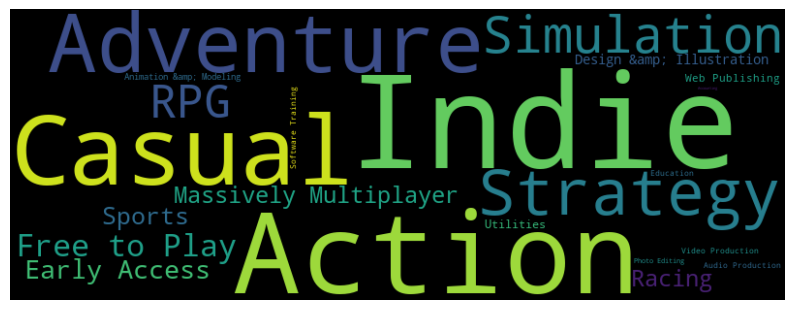

In [6]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df['genres'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
# Convierte las listas en la columna 'tags' en una cadena separada por comas
df['tags'] = df['tags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Separa la cadena por comas y agrega una fila por cada valor individual
df['tags'] = df['tags'].str.split(', ')
df = df.explode('tags')

In [8]:
df['tags'].nunique()

339

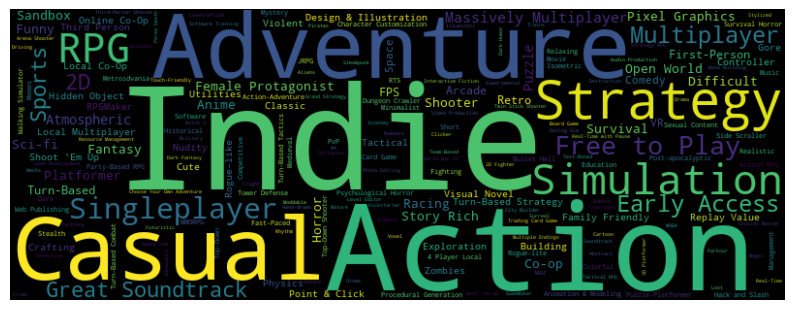

In [9]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df['tags'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
# Cantidad diferentes de especificaciones
df['tags'].nunique()

339

In [11]:
# Convierte las listas en la columna 'specs' en una cadena separada por comas
df['specs'] = df['specs'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Separa la cadena por comas y agrega una fila por cada valor individual
df['specs'] = df['specs'].str.split(', ')
df = df.explode('specs')

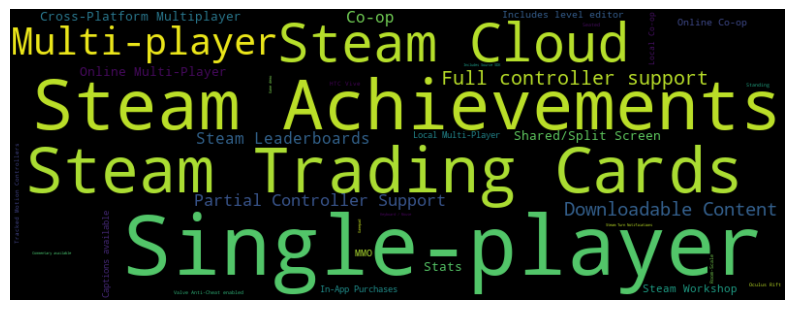

In [12]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df['specs'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Muestra título de las columnas
df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore'],
      dtype='object')

In [14]:
# Cambia nombre de los títulos de las columnas

df.columns = ['editor', 'genre', 'nombre_aplicacion', 'titulo', 'url', 'release_date','etiqueta',
'precio_descuento', 'url_resenia', 'especificacion', 'precio', 'acceso_anticipado', 'id',
'desarrollador', 'sentimiento', 'metascore']

df.head(2)

,editor,genre,nombre_aplicacion,titulo,url,release_date,etiqueta,precio_descuento,url_resenia,especificacion,precio,acceso_anticipado,id,desarrollador,sentimiento,metascore
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,Strategy,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,Action,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN


In [15]:
# Agrega una columna con el año y elimina la columna con fecha completa

df['año'] = df['release_date'].str.extract(r'(\d{4})')

df.drop(columns=['release_date'], inplace = True)

df.head(2)

,editor,genre,nombre_aplicacion,titulo,url,etiqueta,precio_descuento,url_resenia,especificacion,precio,acceso_anticipado,id,desarrollador,sentimiento,metascore,año
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Strategy,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN,2018
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Action,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN,2018


In [16]:
# Años de la base de datos
df['año'].unique()

array(['2018', '2017', nan, '1997', '1998', '2016', '2006', '2005',
       '2003', '2007', '2002', '2000', '1995', '1996', '1994', '2001',
       '1993', '2004', '1999', '2008', '2009', '1992', '1989', '2010',
       '2011', '2013', '2012', '2014', '1983', '1984', '2015', '1990',
       '1988', '1991', '1985', '1982', '1987', '1981', '1986', '2021',
       '5275', '2019', '1975', '1970', '1980'], dtype=object)

In [17]:
# Cantidad de filas con el año superor a 2050
df[df['año'] > '2050'].count()

editor               45
genre                45
nombre_aplicacion    45
titulo               45
url                  45
etiqueta             45
precio_descuento      0
url_resenia          45
especificacion       45
precio                0
acceso_anticipado    45
id                   45
desarrollador        45
sentimiento           0
metascore             0
año                  45
dtype: int64

In [18]:
# Elimina filas con años mayores a 2050
df = df[df['año'] < '2050']
df['año'].unique()

array(['2018', '2017', '1997', '1998', '2016', '2006', '2005', '2003',
       '2007', '2002', '2000', '1995', '1996', '1994', '2001', '1993',
       '2004', '1999', '2008', '2009', '1992', '1989', '2010', '2011',
       '2013', '2012', '2014', '1983', '1984', '2015', '1990', '1988',
       '1991', '1985', '1982', '1987', '1981', '1986', '2021', '2019',
       '1975', '1970', '1980'], dtype=object)

In [19]:
# Tamaño de la base de datos
df.shape

(1995675, 16)

In [20]:
# Borra todas las filas sin año
df.dropna(subset=['año'], inplace=True)

df.shape

(1995675, 16)

In [21]:
df.head(2)

,editor,genre,nombre_aplicacion,titulo,url,etiqueta,precio_descuento,url_resenia,especificacion,precio,acceso_anticipado,id,desarrollador,sentimiento,metascore,año
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Strategy,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN,2018
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,Action,4.49,http://steamcommunity.com/app/761140/reviews/?...,Single-player,4.99,False,761140,Kotoshiro,NaN,NaN,2018


In [22]:
# Elimina las columnas 'editor','desarrollador','url, 'url_resenia', 'precio_descuento' e 'id'
df.drop(columns=['editor','desarrollador', 'precio_descuento', 'url', 'url_resenia', 'id'], inplace=True)

df.head(2)

,genre,nombre_aplicacion,titulo,etiqueta,especificacion,precio,acceso_anticipado,sentimiento,metascore,año
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,Strategy,Single-player,4.99,False,NaN,NaN,2018
0,Action,Lost Summoner Kitty,Lost Summoner Kitty,Action,Single-player,4.99,False,NaN,NaN,2018


In [23]:
# Reemplaza los valores nulos en la columna 'titulo' con los valores de la columna 'nombre_aplicacion'
df['titulo'].fillna(df['nombre_aplicacion'], inplace=True)

# Elimina la columna 'nombre_aplicacion'
df.drop(columns=['nombre_aplicacion'],inplace=True)

In [24]:
df.head()

,genre,titulo,etiqueta,especificacion,precio,acceso_anticipado,sentimiento,metascore,año
0,Action,Lost Summoner Kitty,Strategy,Single-player,4.99,False,NaN,NaN,2018
0,Action,Lost Summoner Kitty,Action,Single-player,4.99,False,NaN,NaN,2018
0,Action,Lost Summoner Kitty,Indie,Single-player,4.99,False,NaN,NaN,2018
0,Action,Lost Summoner Kitty,Casual,Single-player,4.99,False,NaN,NaN,2018
0,Action,Lost Summoner Kitty,Simulation,Single-player,4.99,False,NaN,NaN,2018


In [25]:
df['sentimiento'].unique()

array([nan, 'Mostly Positive', 'Mixed', '1 user reviews',
       '3 user reviews', 'Very Positive', 'Overwhelmingly Positive',
       '6 user reviews', '5 user reviews', '2 user reviews',
       'Very Negative', 'Positive', 'Mostly Negative', '9 user reviews',
       '8 user reviews', 'Negative', '4 user reviews', '7 user reviews',
       'Overwhelmingly Negative'], dtype=object)

In [26]:
def categorize_sentiment(sentiments):
    sentiment_mapping = {
        'Very Negative': 'Muy negativo',
        'Negative': 'Negativo',
        'Mostly Negative': 'Negativo',
        'Mixed': 'Neutro',
        '1 user reviews': 'Neutro',
        '2 user reviews': 'Neutro',
        '3 user reviews': 'Neutro',
        '4 user reviews': 'Neutro',
        '5 user reviews': 'Neutro',
        '6 user reviews': 'Neutro',
        '7 user reviews': 'Neutro',
        '8 user reviews': 'Neutro',
        '9 user reviews': 'Neutro',
        'Positive': 'Positivo',
        'Mostly Positive': 'Positivo',
        'Very Positive': 'Muy positivo',
        'Overwhelmingly Positive': 'Muy positivo',
        'Overwhelmingly Negative': 'Muy negativo'
    }

    return [sentiment_mapping.get(sentiment, sentiment) for sentiment in sentiments]

df['sentimiento'] = categorize_sentiment(df['sentimiento'])

In [27]:
df['sentimiento'].unique()

array([nan, 'Positivo', 'Neutro', 'Muy positivo', 'Muy negativo',
       'Negativo'], dtype=object)

In [28]:
# Todos los strings en minúsculas
df = df.apply(lambda x: x.astype(str).str.lower() if x.dtype == "object" else x)

# Reemplaza '-' por ' ' en todas las columnas
df = df.apply(lambda x: x.str.replace('-', ' ') if x.dtype == "object" else x)

# Reemplaza '!' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace('!', '') if x.dtype == "object" else x)

# Reemplaza '¡' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace('¡', '') if x.dtype == "object" else x)

# Reemplaza '?' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace('?', '') if x.dtype == "object" else x)

# Reemplaza '¿' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace('¿', '') if x.dtype == "object" else x)

# Reemplaza '"' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace('"', '') if x.dtype == "object" else x)

# Reemplaza ''' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace("'", '') if x.dtype == "object" else x)

# Reemplaza ',' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace(",", '') if x.dtype == "object" else x)

# Reemplaza '&' por '' en todas las columnas
df = df.apply(lambda x: x.str.replace("&", '') if x.dtype == "object" else x)

# Reemplaza "''" por '' en todas las columnas
df = df.apply(lambda x: x.str.replace("''", '') if x.dtype == "object" else x)

# Reemplaza "_" por '' en todas las columnas
df = df.apply(lambda x: x.str.replace("_", '') if x.dtype == "object" else x)

df.head(2)

,genre,titulo,etiqueta,especificacion,precio,acceso_anticipado,sentimiento,metascore,año
0,action,lost summoner kitty,strategy,single player,4.99,False,nan,nan,2018
0,action,lost summoner kitty,action,single player,4.99,False,nan,nan,2018


In [29]:
df['sentimiento'].unique()

array(['nan', 'positivo', 'neutro', 'muy positivo', 'muy negativo',
       'negativo'], dtype=object)

In [30]:
# Utiliza la función 'melt' para transformar el DataFrame
df = pd.melt(df, id_vars=['titulo','especificacion', 'precio','acceso_anticipado','sentimiento','metascore','año'],
                          value_vars=['genre', 'etiqueta'], var_name='atributo', value_name='genero')

df = df.drop('atributo', axis=1)

In [31]:
# Elimina espacios adicionales al inicio y al final de las cadenas de texto en todas las columnas
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [32]:
df['precio'].unique()

array(['4.99', 'free to play', '0.99', '3.99', '9.99', '18.99', '29.99',
       'nan', '10.99', '2.99', '1.59', '14.99', '1.99', '59.99', '8.99',
       '6.99', '7.99', '39.99', 'free', '19.99', '7.49', '12.99', '5.99',
       '2.49', '15.99', '1.25', '24.99', '17.99', '61.99', '3.49',
       '11.99', '13.99', 'free demo', 'play for free', '34.99', '1.49',
       '32.99', '99.99', '14.95', '69.99', '16.99', '79.99', '49.99',
       '5.0', '44.99', '13.98', '29.96', '119.99', '109.99', '149.99',
       '771.71', 'install now', '21.99', '89.99',
       'play warmachine: tactics demo', '0.98', '139.92', '4.29', '64.99',
       'free mod', '54.99', '74.99', 'install theme', '0.89',
       'third party', '0.5', 'play now', '299.99', '1.29', '3.0', '15.0',
       '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       'free hitman™ holiday pack', '36.99', '4.49', '2.0', '4.0',
       '234.99', '1.95', '1.5', '199.0', '189.0', '6.66', '27.99',
       '10.49', '129.99', '179.0', '26.99', '39

In [33]:
# Transformacion de precios
def transformar_valor(valor):
    # Reemplaza 'free' con 0.00
    if isinstance(valor, str) and 'free' in valor.lower():
        return 0.00
    # Convierte str a float con dos decimales
    elif isinstance(valor, str):
        try:
            return round(float(valor), 2)
        except ValueError:
            return np.nan
    # Convierte int a float con dos decimales
    elif isinstance(valor, int):
        return round(float(valor), 2)
    # Reemplaza cualquier otro valor no reconocido con NaN
    else:
        return np.nan

# Aplica la función a cada celda del DataFrame
df['precio'] = df['precio'].apply(transformar_valor)

df.head(2)

,titulo,especificacion,precio,acceso_anticipado,sentimiento,metascore,año,genero
0,lost summoner kitty,single player,4.99,False,nan,nan,2018,action
1,lost summoner kitty,single player,4.99,False,nan,nan,2018,action


In [34]:
# Cantidad diferente de genero
df['genero'].nunique()

341

In [35]:
# Reemplaza False por 0 y True por 1 en la columna 'acceso_anticipado' y convierte a int
df['acceso_anticipado'] = df['acceso_anticipado'].replace({False: 0, True: 1}).astype(int)

# Reemplaza todos los valores nulos por NaN en la columna 'metascore'
df['metascore'] = df['metascore'].replace('nan', np.nan)

# Reemplaza todos los valores nulos por NaN en la columna 'sentimiento'
df['sentimiento'] = df['sentimiento'].replace('nan', np.nan)

df.head()

,titulo,especificacion,precio,acceso_anticipado,sentimiento,metascore,año,genero
0,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
1,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
2,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
3,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
4,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action


In [36]:
df['sentimiento'].unique()

array([nan, 'positivo', 'neutro', 'muy positivo', 'muy negativo',
       'negativo'], dtype=object)

In [37]:
df['año'] = df['año'].astype(str)
df['año'].dtype

dtype('O')

In [38]:
df['genero'].nunique()

341

In [39]:
# Resumen general
df.info

<bound method DataFrame.info of                       titulo      especificacion  precio  acceso_anticipado  \
0        lost summoner kitty       single player    4.99                  0   
1        lost summoner kitty       single player    4.99                  0   
2        lost summoner kitty       single player    4.99                  0   
3        lost summoner kitty       single player    4.99                  0   
4        lost summoner kitty       single player    4.99                  0   
...                      ...                 ...     ...                ...   
3991345  exit 2   directions  steam achievements    4.99                  0   
3991346  exit 2   directions         steam cloud    4.99                  0   
3991347  exit 2   directions       single player    4.99                  0   
3991348  exit 2   directions  steam achievements    4.99                  0   
3991349  exit 2   directions         steam cloud    4.99                  0   

        sentimiento

In [40]:
# Nombre de cada columna
df.columns

Index(['titulo', 'especificacion', 'precio', 'acceso_anticipado',
       'sentimiento', 'metascore', 'año', 'genero'],
      dtype='object')

In [41]:
# Estadísticas descriptivas de las columnas numéricas
df.describe

<bound method NDFrame.describe of                       titulo      especificacion  precio  acceso_anticipado  \
0        lost summoner kitty       single player    4.99                  0   
1        lost summoner kitty       single player    4.99                  0   
2        lost summoner kitty       single player    4.99                  0   
3        lost summoner kitty       single player    4.99                  0   
4        lost summoner kitty       single player    4.99                  0   
...                      ...                 ...     ...                ...   
3991345  exit 2   directions  steam achievements    4.99                  0   
3991346  exit 2   directions         steam cloud    4.99                  0   
3991347  exit 2   directions       single player    4.99                  0   
3991348  exit 2   directions  steam achievements    4.99                  0   
3991349  exit 2   directions         steam cloud    4.99                  0   

        sentimien

In [42]:
# Estadísticas descriptivas de las columnas categóricas
df.describe(include='object')

,titulo,especificacion,sentimiento,metascore,año,genero
count,3991350,3991350,3431450,671568,3991350,3991350
unique,29923,32,5,71,43,341
top,arm planetary prospectors asteroid resource mi...,single player,neutro,80,2017,indie
freq,3960,754988,1392228,35222,1254132,667475


In [43]:
# Valores faltantes de cada columna
df.isnull().sum()

titulo                     0
especificacion             0
precio                113676
acceso_anticipado          0
sentimiento           559900
metascore            3319782
año                        0
genero                     0
dtype: int64

In [44]:
df['genero'] = df['genero'].replace('nan', np.nan)

In [45]:
df[df['genero'] == 'nan']

,titulo,especificacion,precio,acceso_anticipado,sentimiento,metascore,año,genero


In [46]:
df

,titulo,especificacion,precio,acceso_anticipado,sentimiento,metascore,año,genero
0,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
1,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
2,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
3,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
4,lost summoner kitty,single player,4.99,0,NaN,NaN,2018,action
...,...,...,...,...,...,...,...,...
3991345,exit 2 directions,steam achievements,4.99,0,neutro,NaN,2017,atmospheric
3991346,exit 2 directions,steam cloud,4.99,0,neutro,NaN,2017,atmospheric
3991347,exit 2 directions,single player,4.99,0,neutro,NaN,2017,relaxing
3991348,exit 2 directions,steam achievements,4.99,0,neutro,NaN,2017,relaxing


In [47]:
df.columns

Index(['titulo', 'especificacion', 'precio', 'acceso_anticipado',
       'sentimiento', 'metascore', 'año', 'genero'],
      dtype='object')

In [48]:
df.dtypes

titulo                object
especificacion        object
precio               float64
acceso_anticipado      int32
sentimiento           object
metascore             object
año                   object
genero                object
dtype: object

In [49]:
df.isnull().sum()

titulo                     0
especificacion             0
precio                113676
acceso_anticipado          0
sentimiento           559900
metascore            3319782
año                        0
genero                  4161
dtype: int64